In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/namphuong/course_materials/web/dataset/data_clean.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14520 entries, 0 to 14519
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                14520 non-null  object 
 1   open                14520 non-null  float64
 2   high                14520 non-null  float64
 3   low                 14520 non-null  float64
 4   close               14520 non-null  float64
 5   volume              14520 non-null  float64
 6   symbol              14520 non-null  object 
 7   p_neg               14520 non-null  float64
 8   p_neu               14520 non-null  float64
 9   p_pos               14520 non-null  float64
 10  has_news            14520 non-null  int64  
 11  ret1                14520 non-null  float64
 12  logret              14520 non-null  float64
 13  ret5                14520 non-null  float64
 14  ret20               14520 non-null  float64
 15  ema20               14520 non-null  float64
 16  ema6

# Tổng quan biến động về giá đóng cửa theo từng mã

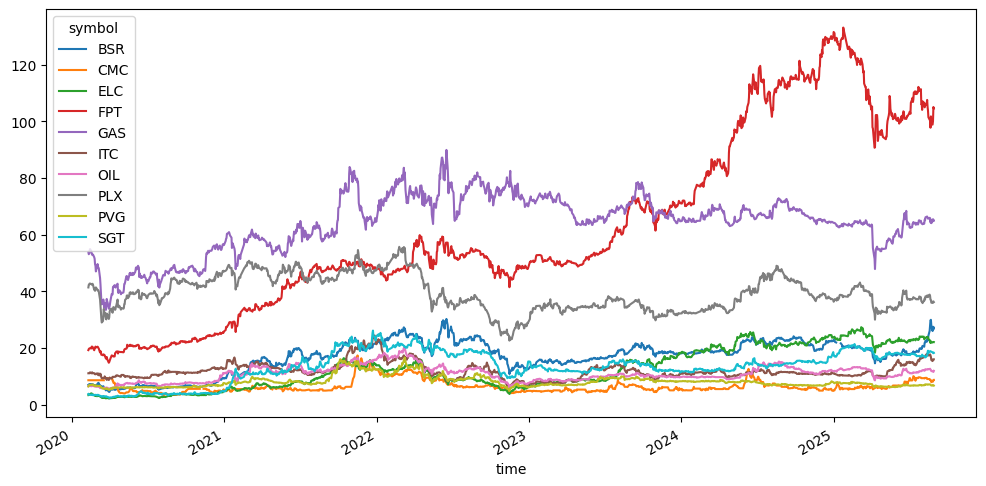

In [8]:
df_no_vnz = df[df["symbol"] != "VNZ"].copy()
df_no_vnz["time"] = pd.to_datetime(df_no_vnz["time"])
df_no_vnz = df_no_vnz.sort_values(["symbol", "time"])
df = df[df["symbol"] != "VNZ"]

dedup = df_no_vnz.drop_duplicates(subset=["time", "symbol"], keep="last")
df_pivot = dedup.pivot(index="time", columns="symbol", values="close")
df_pivot.plot(figsize=(12, 6))
plt.show()

# Phân phối gía 

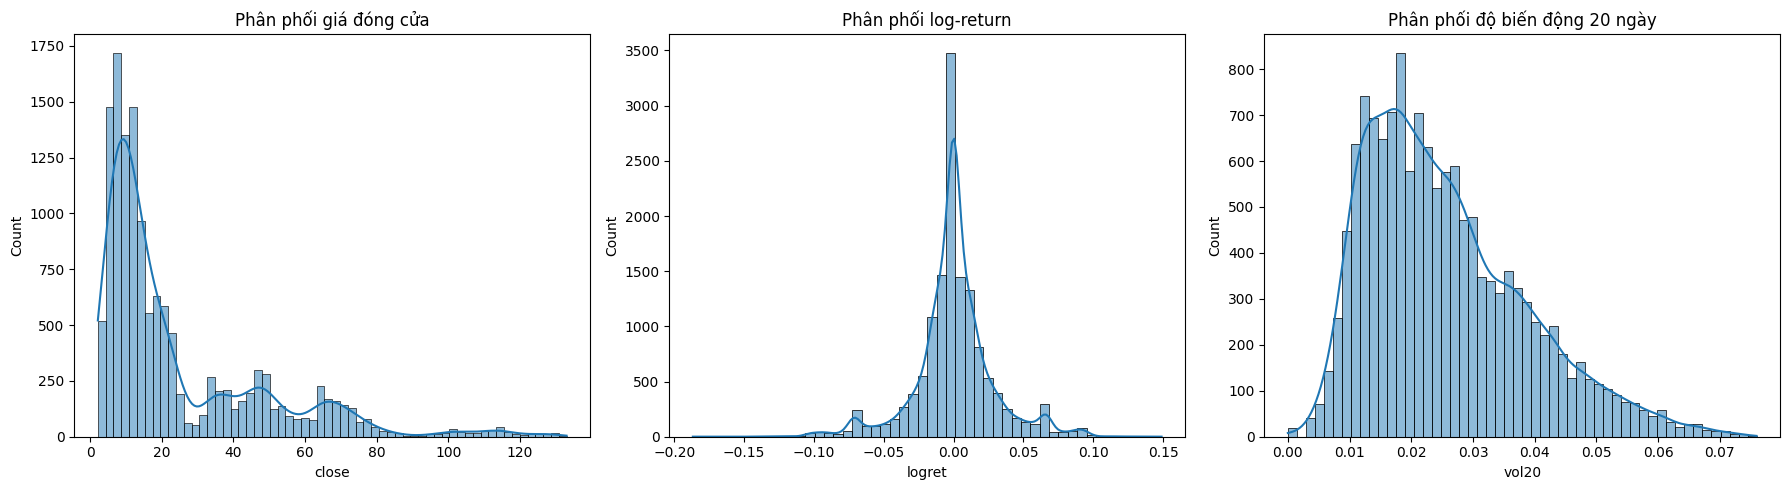

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 hàng, 3 cột

# Phân phối giá đóng cửa
sns.histplot(data=df, x="close", kde=True, ax=axes[0])
axes[0].set_title("Phân phối giá đóng cửa")

# Phân phối log-return
sns.histplot(data=df, x="logret", kde=True, bins=50, ax=axes[1])
axes[1].set_title("Phân phối log-return")

# Phân phối độ biến động 20 ngày
sns.histplot(data=df, x="vol20", kde=True, ax=axes[2])
axes[2].set_title("Phân phối độ biến động 20 ngày")

plt.tight_layout()
plt.show()

# Xu hướng giá và chỉ số EMA (Đánh giá biến động dài hạn)

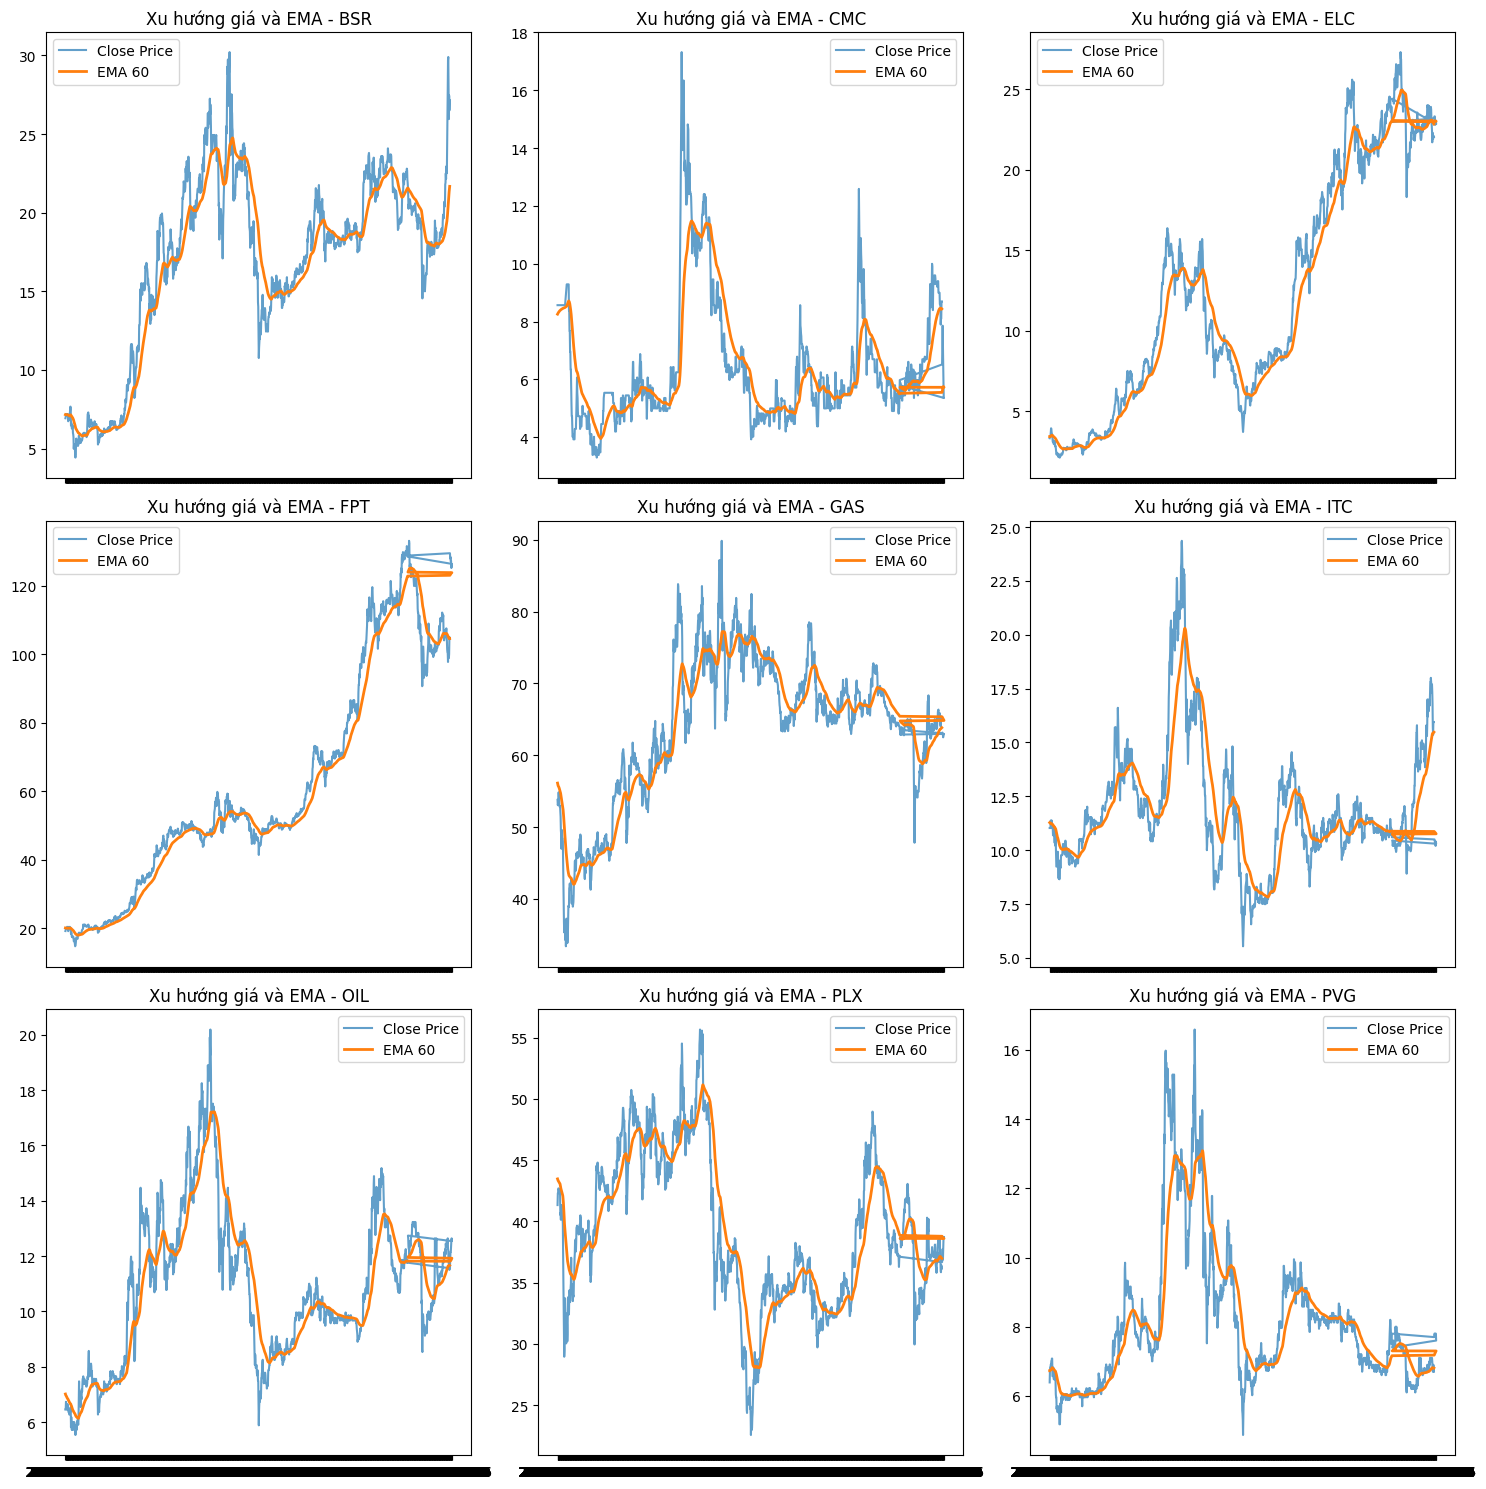

In [16]:
import math

symbols = df["symbol"].unique()

n = min(9, len(symbols))

cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), sharex=True)

axes = axes.flatten()

for i, sym in enumerate(symbols[:n]):
    data_sym = df[df["symbol"] == sym]
    axes[i].plot(data_sym["time"], data_sym["close"], label="Close Price", alpha=0.7)
    axes[i].plot(data_sym["time"], data_sym["ema60"], label="EMA 60", linewidth=2)
    axes[i].set_title(f"Xu hướng giá và EMA - {sym}")
    axes[i].legend()

# Ẩn các subplot thừa (nếu có)
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

# Kiểm tra sự tương quan giữa các biến (theo mã)

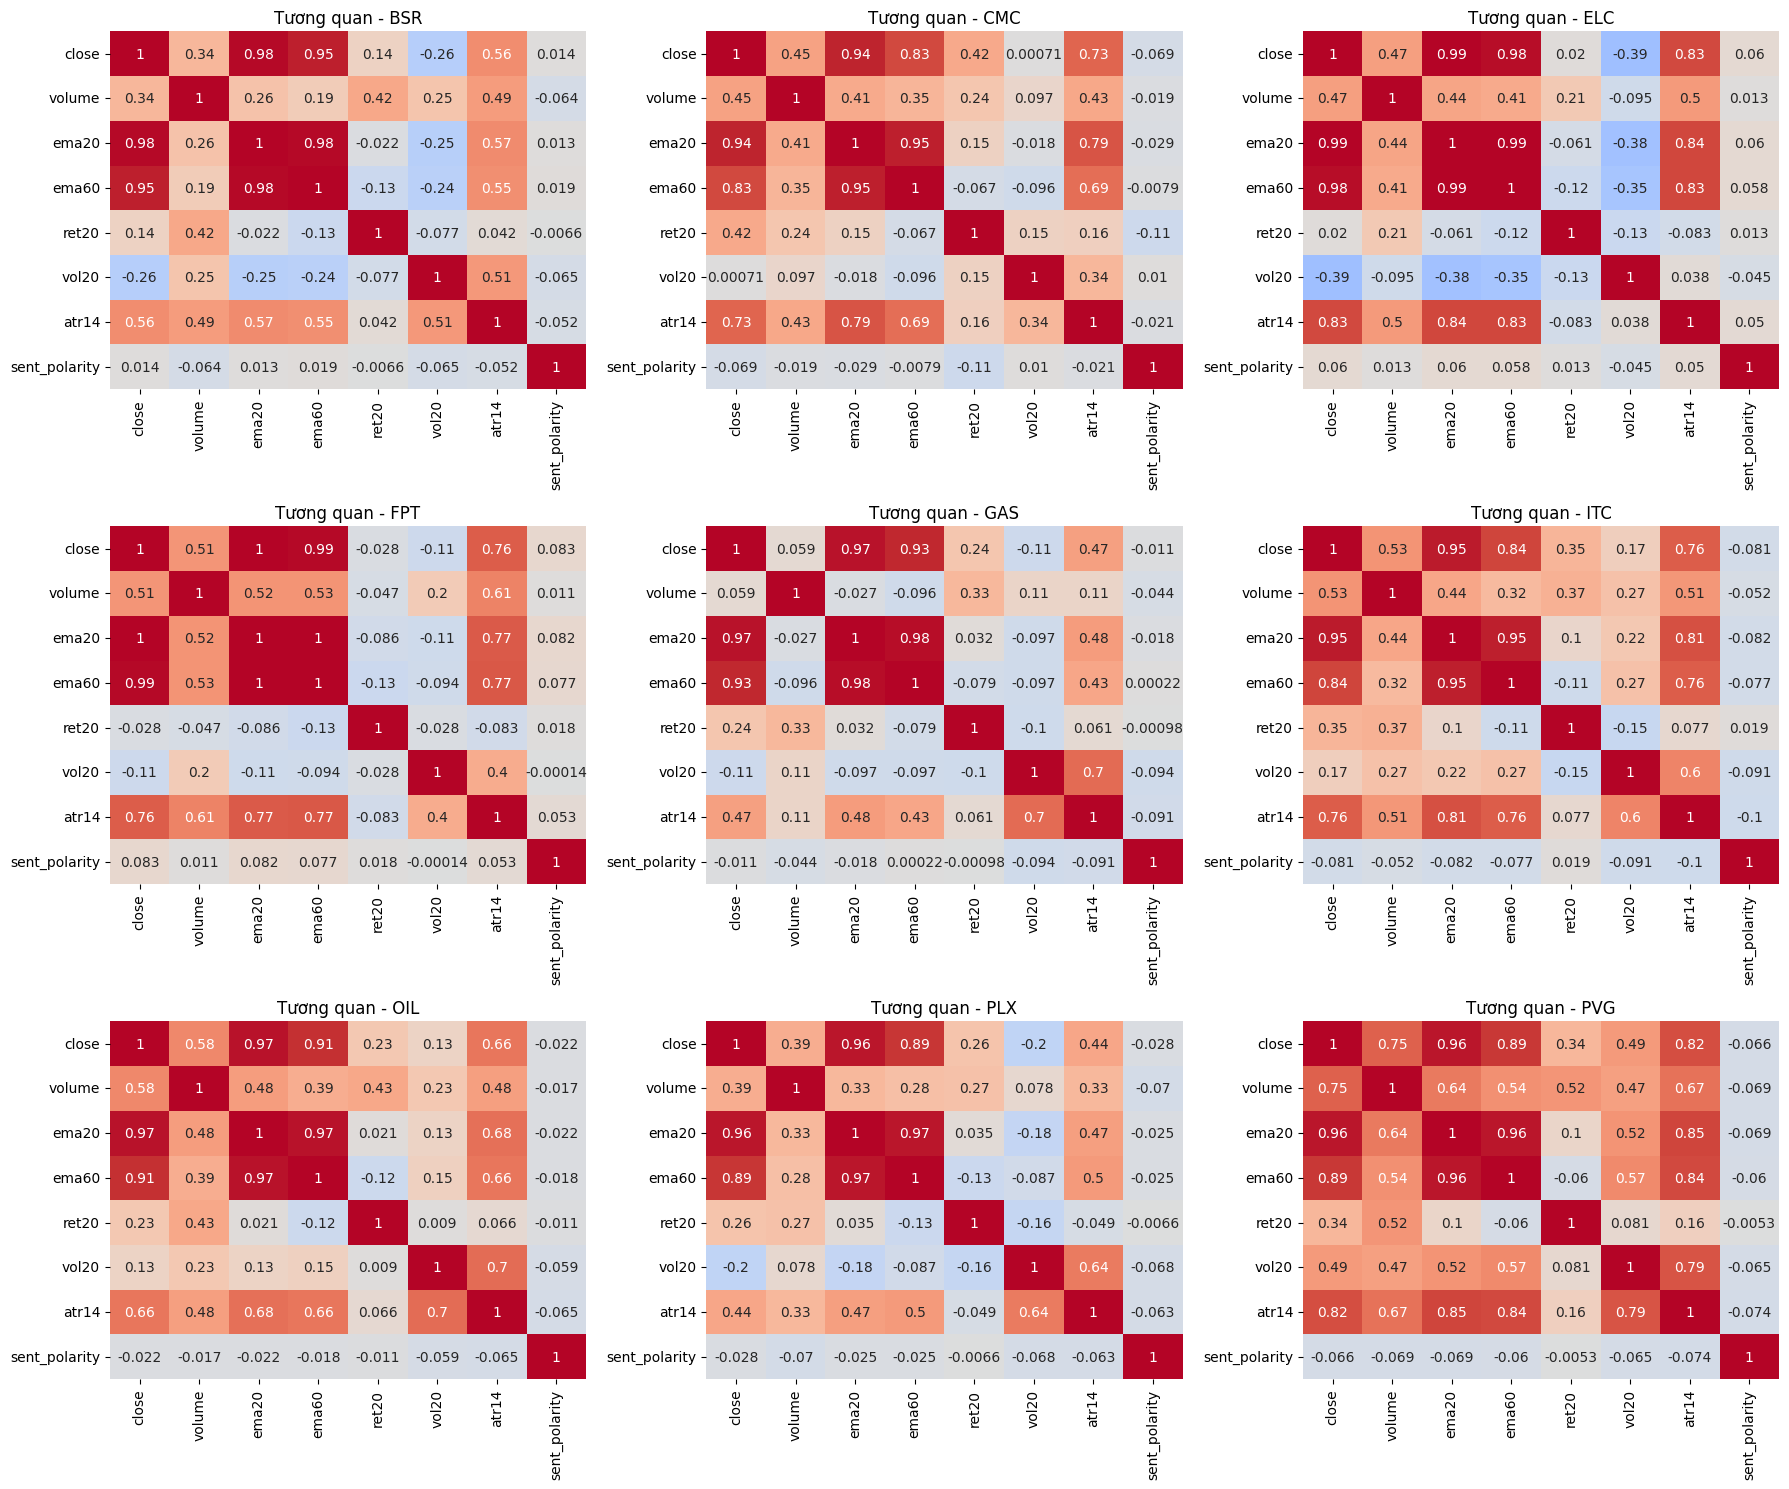

In [17]:
symbols = df["symbol"].unique()[:9]

# Tạo subplot 3x3
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

for i, sym in enumerate(symbols):
    data_sym = df[df["symbol"] == sym]
    corr = data_sym[["close","volume","ema20","ema60","ret20","vol20","atr14","sent_polarity"]].corr()

    ax = axes[i//3, i%3]  # xác định vị trí trong lưới 3x3
    sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, ax=ax, cbar=False)
    ax.set_title(f"Tương quan - {sym}")

plt.tight_layout()
plt.show()


# Scatterplot (sent_polarity vs ret20)

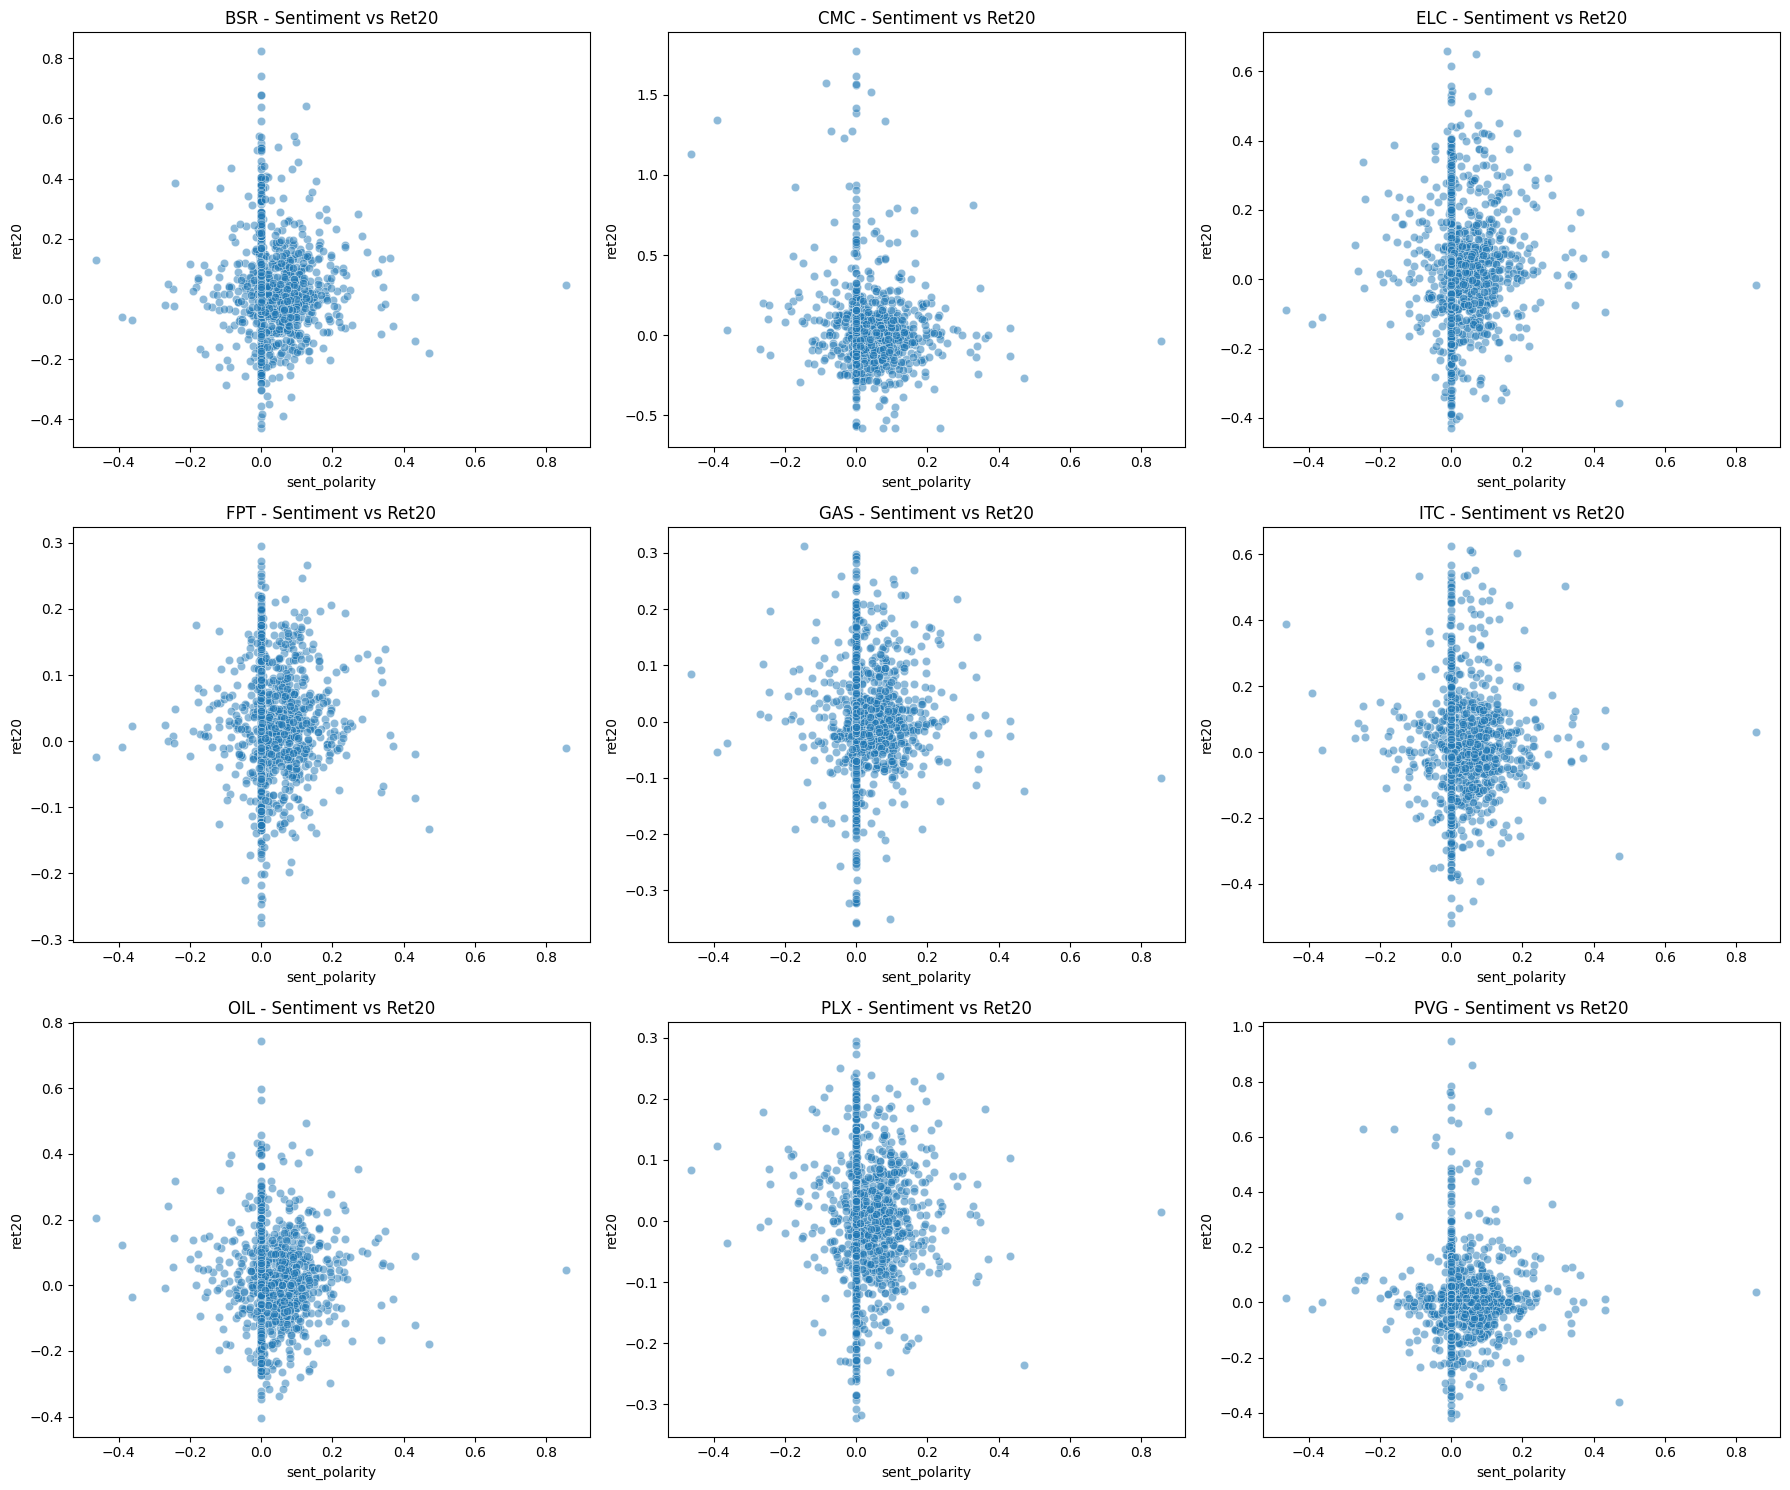

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

for i, sym in enumerate(symbols):
    ax = axes[i // 3, i % 3]
    data_sym = df[df["symbol"] == sym]
    sns.scatterplot(x="sent_polarity", y="ret20", data=data_sym, alpha=0.5, ax=ax)
    ax.set_title(f"{sym} - Sentiment vs Ret20")

plt.tight_layout()
plt.show()

# Boxplot (has_news vs ret20)

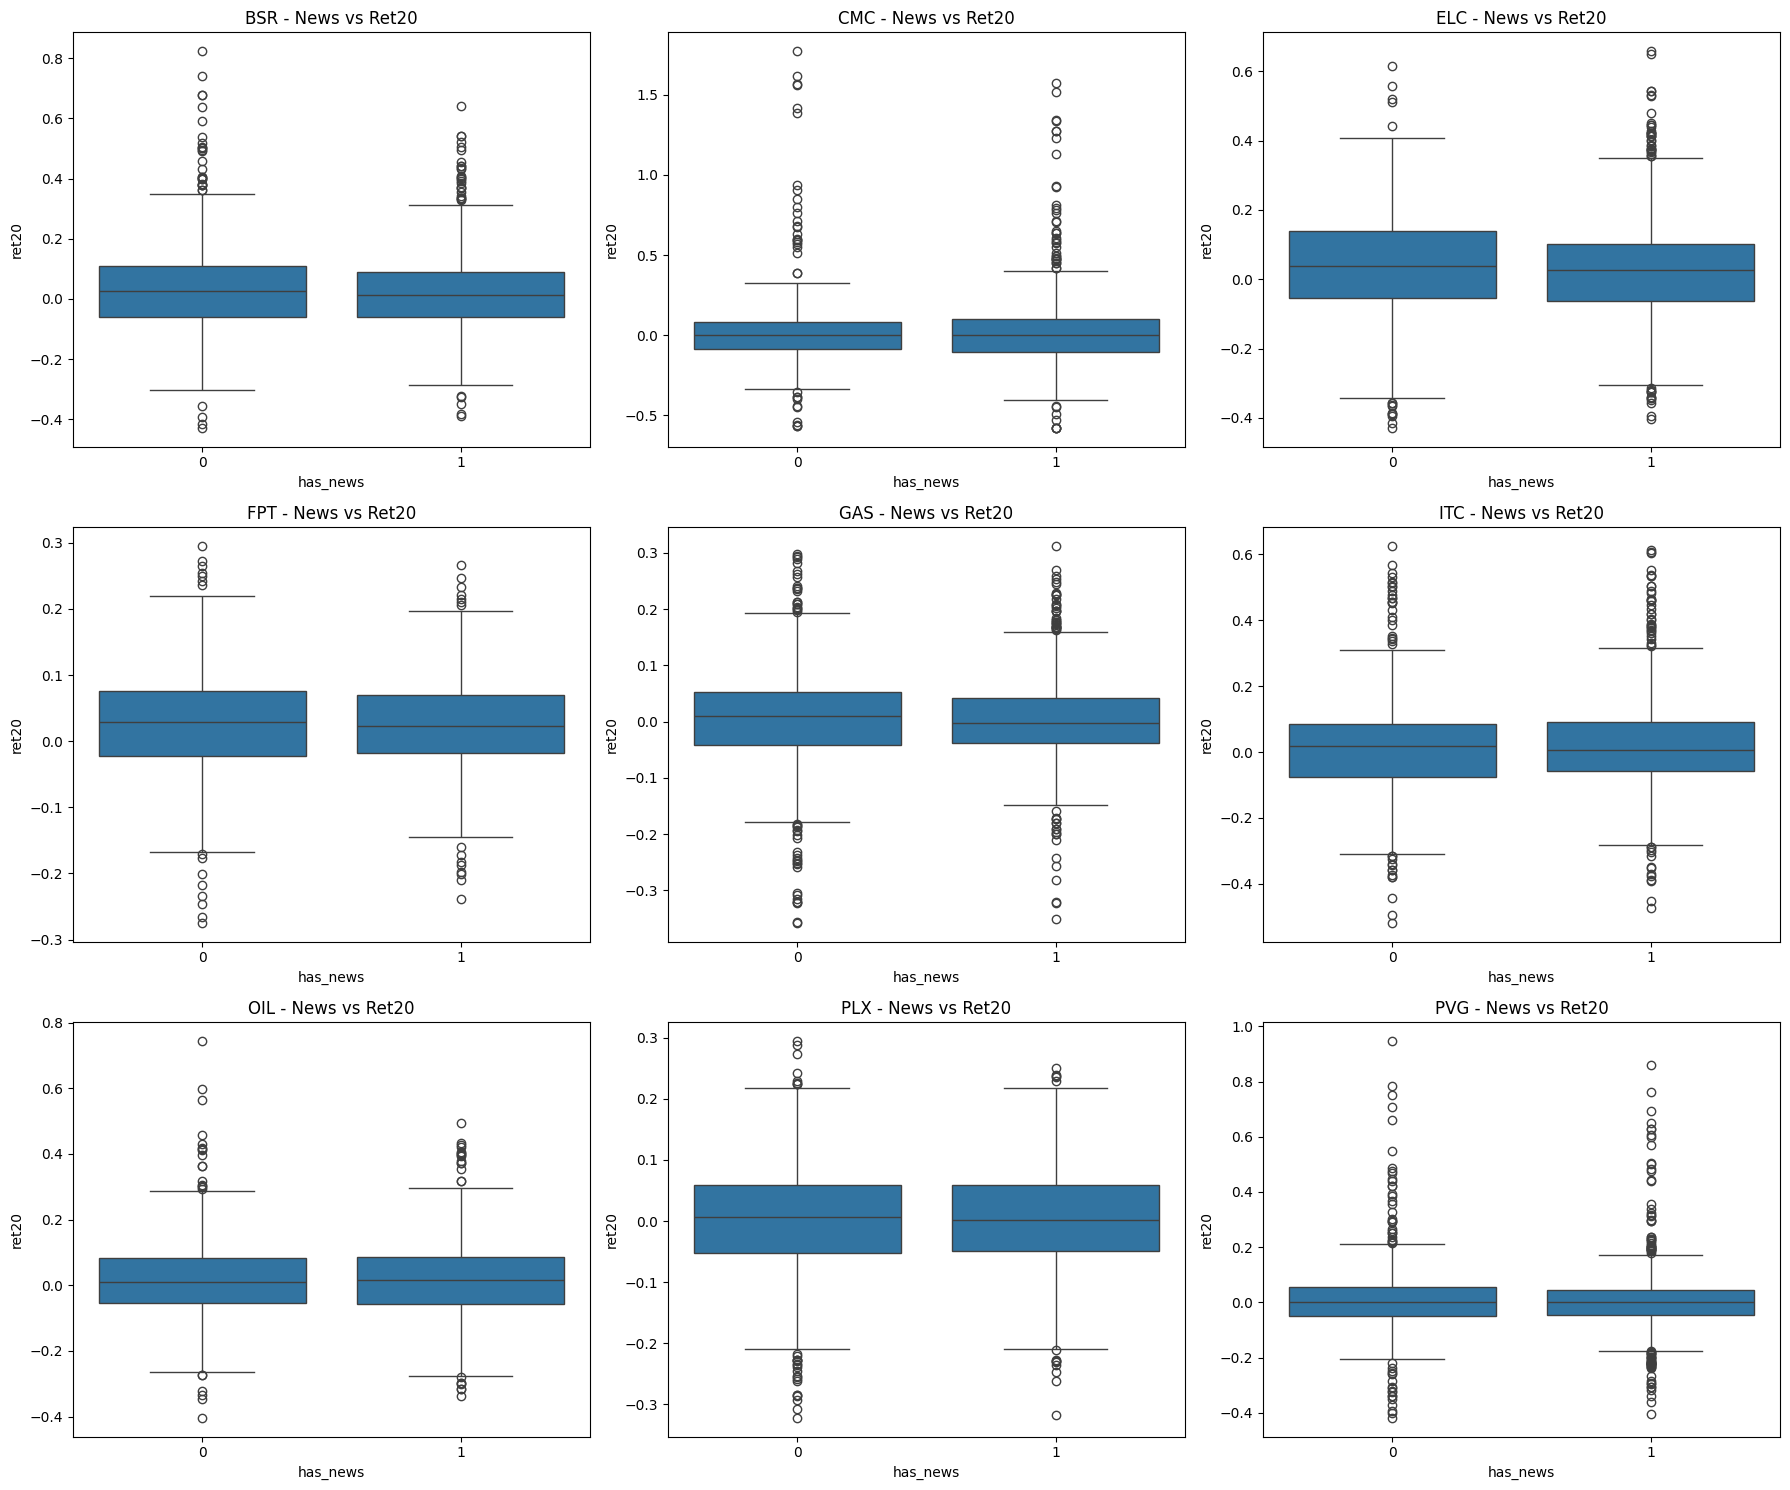

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

for i, sym in enumerate(symbols):
    ax = axes[i // 3, i % 3]
    data_sym = df[df["symbol"] == sym]
    sns.boxplot(x="has_news", y="ret20", data=data_sym, ax=ax)
    ax.set_title(f"{sym} - News vs Ret20")

plt.tight_layout()
plt.show()

NHẬN XÉT

1 Scatterplot (Sentiment Polarity vs Ret20)

Các điểm dữ liệu phân tán rộng nhưng hầu hết tập trung quanh Sentiment Polarity ≈ 0 và Ret20 ≈ 0.

Không thấy mối quan hệ tuyến tính rõ rệt giữa mức độ cảm xúc (tích cực/tiêu cực) và lợi nhuận 20 ngày.

Một số điểm ngoại lai cho thấy đôi khi sentiment cực đoan có thể tạo biến động mạnh về lợi nhuận, nhưng hiếm.



2 Boxplot (Has News vs Ret20)

Khi so sánh hai nhóm có tin tức và không có tin tức, median của lợi nhuận 20 ngày khá tương đồng.

Tuy nhiên, độ phân tán (spread) ở nhóm có tin tức lớn hơn, nghĩa là lợi nhuận biến động mạnh hơn khi xuất hiện tin tức.

Có nhiều outlier ở cả hai nhóm, nhưng rõ rệt hơn ở nhóm có tin tức.

# Biểu đồ nến

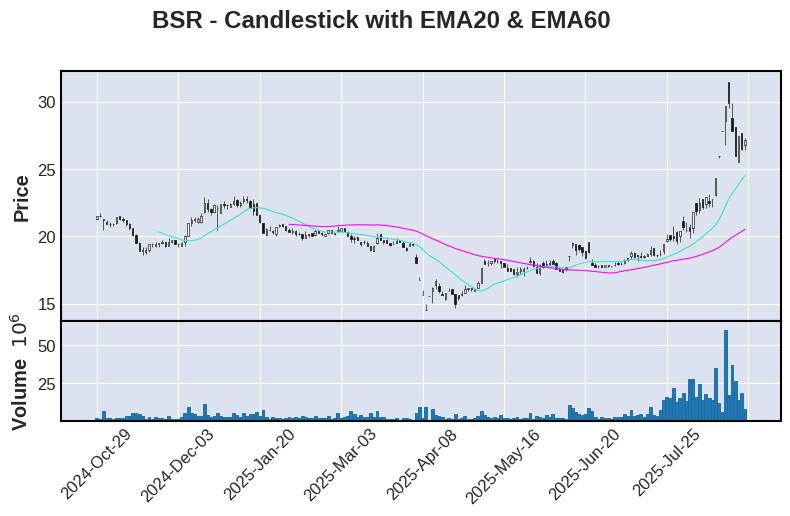

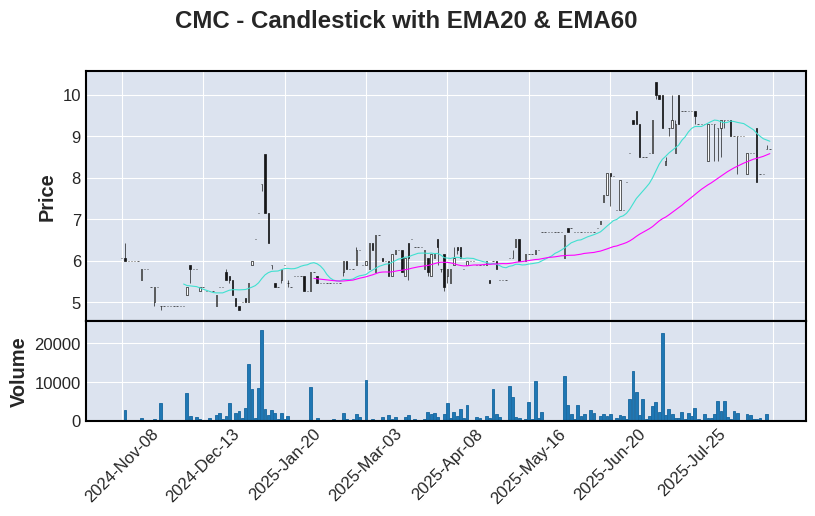

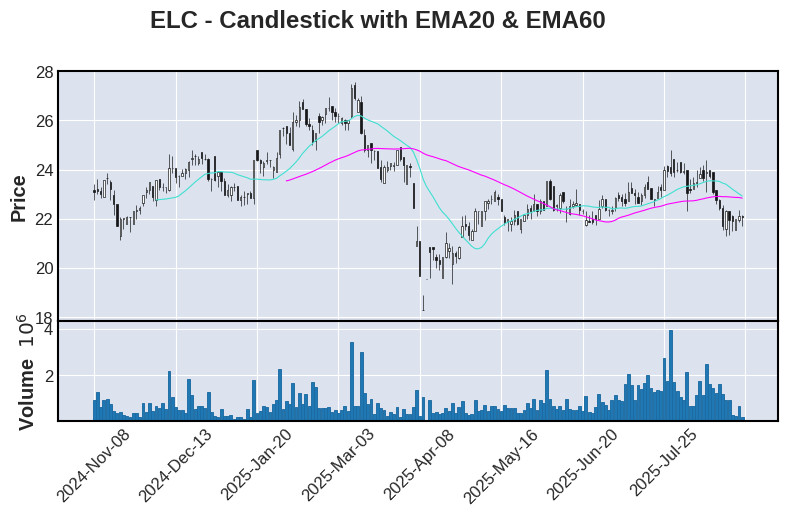

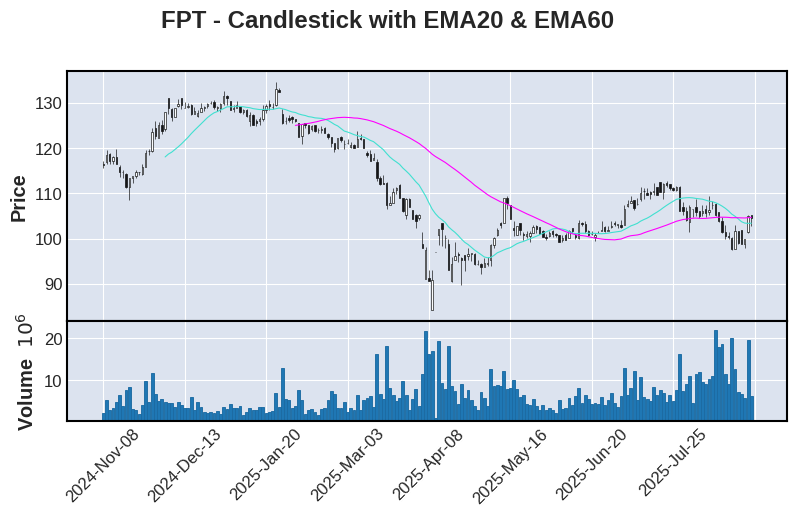

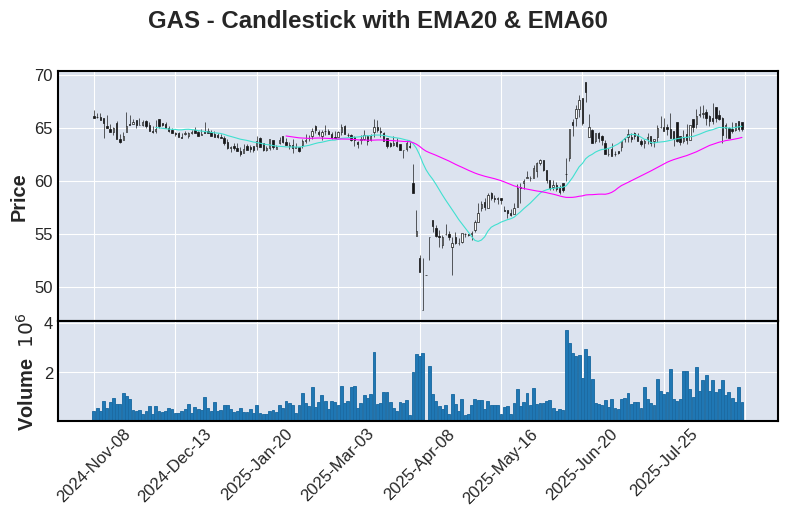

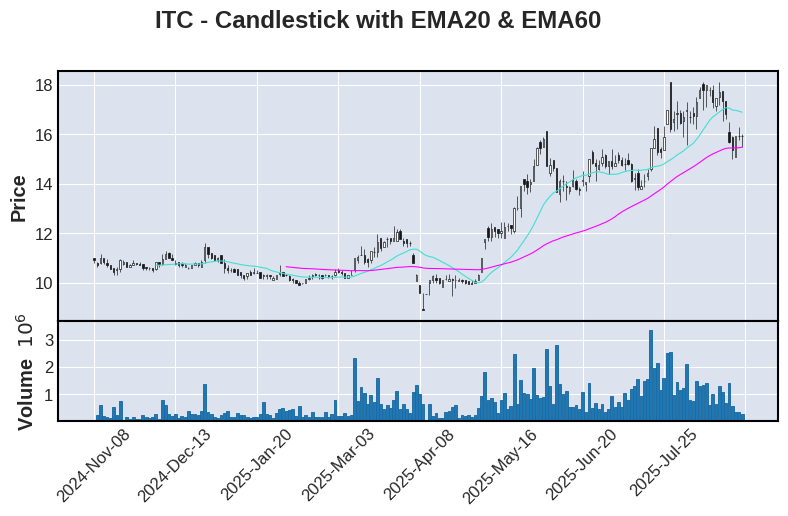

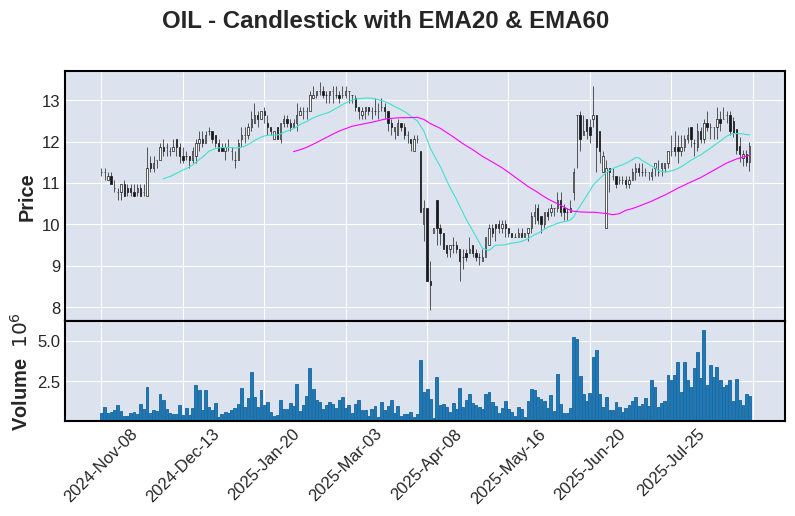

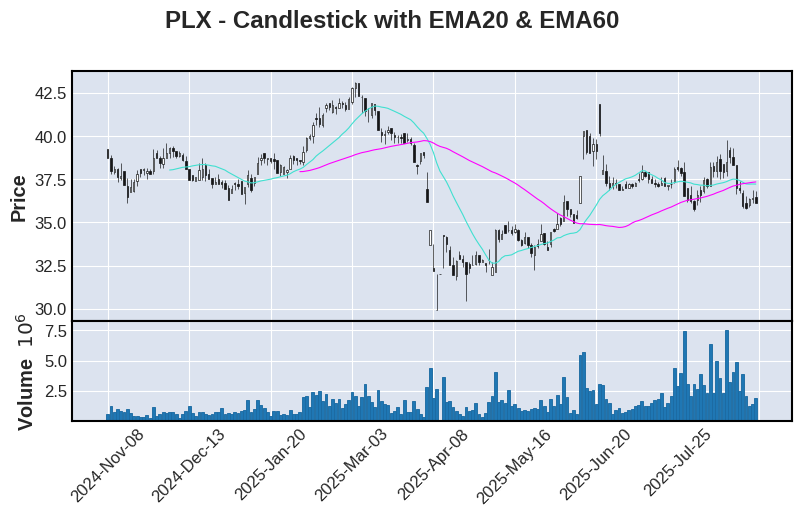

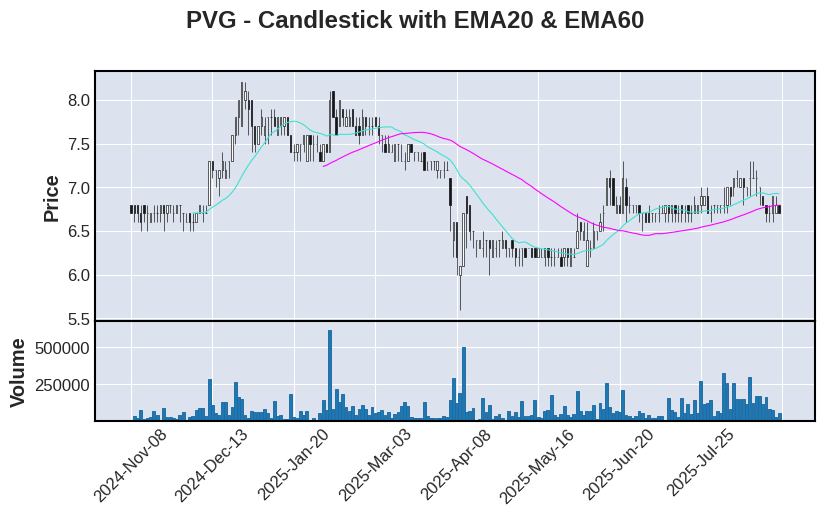

In [20]:
import mplfinance as mpf
import matplotlib.pyplot as plt

# Chuyển time thành datetime index (nếu chưa)
df["time"] = pd.to_datetime(df["time"])
df.set_index("time", inplace=True)

symbols = df["symbol"].unique()[:9]

# Lặp qua từng mã và vẽ chart
for sym in symbols:
    data_sym = df[df["symbol"] == sym].copy()
    # mplfinance yêu cầu index dạng datetime và có cột OHLC
    data_sym = data_sym[["open", "high", "low", "close", "volume"]]
    data_sym = data_sym.tail(200)  # lấy 200 phiên gần nhất

    mpf.plot(
        data_sym,
        type="candle",
        mav=(20, 60),
        volume=True,
        figsize=(10, 5),
        title=f"{sym} - Candlestick with EMA20 & EMA60",
    )